# Importation des libraries

In [85]:
import pandasql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from matplotlib.ticker import FuncFormatter
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter

In [86]:
df = pd.read_excel('Sherdog_data.xlsx') 

In [87]:
df

,Methode_finission,resultat,Date_combat,Durée_combat,Round_final,date_naissance,Année_combat,Age,Catégorie,Nom,Civilité
0,Decision (Unanimous),WIN,2022,5:00,5,1988,2022,34,FEATHERWEIGHT,ALEXANDER VOLKANOVSKI,Homme
1,TKO (Punches),WIN,2022,0:45,4,1988,2022,34,FEATHERWEIGHT,ALEXANDER VOLKANOVSKI,Homme
2,Decision (Unanimous),WIN,2021,5:00,5,1988,2021,33,FEATHERWEIGHT,ALEXANDER VOLKANOVSKI,Homme
3,Decision (Split),WIN,2020,5:00,5,1988,2020,32,FEATHERWEIGHT,ALEXANDER VOLKANOVSKI,Homme
4,Decision (Unanimous),WIN,2019,5:00,5,1988,2019,31,FEATHERWEIGHT,ALEXANDER VOLKANOVSKI,Homme
...,...,...,...,...,...,...,...,...,...,...,...
716,TKO (Doctor Stoppage),LOSS,2012,5:00,2,1989,2012,23,BANTAMWEIGHT,JULIANNA PENA,Femme
717,Submission (Guillotine Choke),WIN,2011,0:17,2,1989,2011,22,BANTAMWEIGHT,JULIANNA PENA,Femme
718,Submission (Armbar),WIN,2009,2:54,2,1989,2009,20,BANTAMWEIGHT,JULIANNA PENA,Femme
719,TKO (Punches),WIN,2009,NaN,1,1989,2009,20,BANTAMWEIGHT,JULIANNA PENA,Femme


In [88]:
df['Durée_combat'] = df['Durée_combat'].str.replace(':','.')
df = df.dropna()

# Préparation des variables pour le model

In [89]:
df['Durée_combat']= df['Durée_combat'].astype(float)

C:\Users\ktshilombo\AppData\Local\Temp\ipykernel_11900\1954790985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Durée_combat']= df['Durée_combat'].astype(float)


In [90]:
#Création de la variable temps
df.loc[(df['Round_final'] == 0 ) , 'T'] = (df['Durée_combat'])
df.loc[(df['Round_final'] == 1 ) , 'T'] = (df['Durée_combat'])
df.loc[(df['Round_final'] == 2 ) , 'T'] = 5+(df['Durée_combat'])
df.loc[(df['Round_final'] == 3 ) , 'T'] = 10+(df['Durée_combat'])
df.loc[(df['Round_final'] == 4 ) , 'T'] = 15+(df['Durée_combat'])
df.loc[(df['Round_final'] == 5 ) , 'T'] = 20+(df['Durée_combat'])

C:\Users\ktshilombo\AppData\Local\Temp\ipykernel_11900\3188962510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df['Round_final'] == 0 ) , 'T'] = (df['Durée_combat'])


In [91]:
df['Catégorie']=df['Catégorie'].astype('category')
df['Civilité']=df['Civilité'].astype('category')

C:\Users\ktshilombo\AppData\Local\Temp\ipykernel_11900\2157333890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Catégorie']=df['Catégorie'].astype('category')
C:\Users\ktshilombo\AppData\Local\Temp\ipykernel_11900\2157333890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Civilité']=df['Civilité'].astype('category')


In [92]:
#Definition de la variable cible
df.loc[((df['Methode_finission'].str.contains("TKO")==True)|(df['Methode_finission'].str.contains("KO")==True)|(df['Methode_finission'].str.contains("Submission")==True))&((df['resultat'] =='WIN')==True), 'statu'] =1
df.loc[(df['statu'] != 1), 'statu'] = 0
df['statu']= df['statu'].astype(int)

C:\Users\ktshilombo\AppData\Local\Temp\ipykernel_11900\2566445731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[((df['Methode_finission'].str.contains("TKO")==True)|(df['Methode_finission'].str.contains("KO")==True)|(df['Methode_finission'].str.contains("Submission")==True))&((df['resultat'] =='WIN')==True), 'statu'] =1
C:\Users\ktshilombo\AppData\Local\Temp\ipykernel_11900\2566445731.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['statu']= df['statu'].astype(int)


# Analyse général 

In [93]:
kmf = KaplanMeierFitter()
kmf.fit(durations =  df["T"],event_observed = df["statu"],label="Global")

<lifelines.KaplanMeierFitter:"Global", fitted with 707 total observations, 333 right-censored observations>

Text(0, 0.5, 'Probabilité de survie')

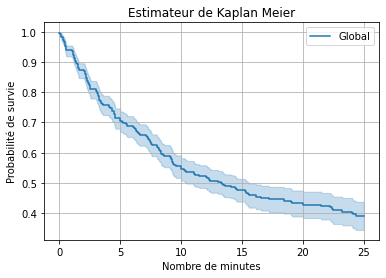

In [94]:
kmf.plot()
plt.grid()
plt.title("Estimateur de Kaplan Meier")
plt.xlabel("Nombre de minutes")
plt.ylabel("Probabilité de survie")

In [95]:
print("La médiane est de :",kmf.median_survival_time_)

La médiane est de : 13.39


Text(0, 0.5, 'Probabilité de finish')

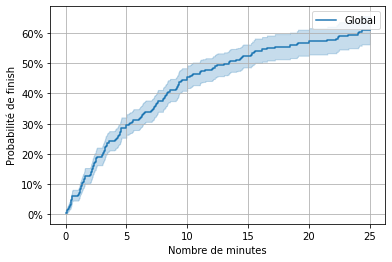

In [96]:
ax = kmf.plot_cumulative_density()
plt.grid()
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
#plt.title("The Kaplan-Meier Estimate")
plt.xlabel("Nombre de minutes")
plt.ylabel("Probabilité de finish")

# Analyse par civilité

In [97]:
kmff = KaplanMeierFitter() 
kmfm= KaplanMeierFitter() 

In [98]:
H = pandasql.sqldf('SELECT DISTINCT * FROM df WHERE Civilité ="Homme"',globals())
F = pandasql.sqldf('SELECT DISTINCT * FROM df WHERE Civilité ="Femme"',globals())

In [99]:
kmfm.fit(durations = H["T"],event_observed = H["statu"] ,label="Homme")
kmff.fit(durations = F["T"],event_observed = F["statu"], label="Femme")

<lifelines.KaplanMeierFitter:"Femme", fitted with 295 total observations, 152 right-censored observations>

Text(0.5, 1.0, 'Estimateur de Kaplan Meier')

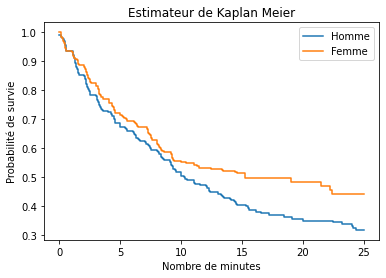

In [100]:
kmfm.plot_survival_function(ci_show= False)
kmff.plot_survival_function(ci_show= False)

plt.xlabel("Nombre de minutes")
plt.ylabel("Probabilité de survie")
plt.title("Estimateur de Kaplan Meier")


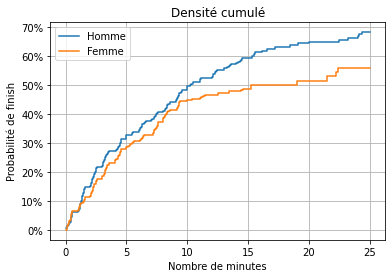

In [101]:
ax= kmfm.plot_cumulative_density(ci_show= False)
bx = kmff.plot_cumulative_density(ci_show= False)
plt.title("Densité cumulé")
plt.xlabel("Nombre de minutes")
plt.ylabel("Probabilité de finish")
plt.grid()
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
bx.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

In [102]:
Time_A = H['T']
Event_A = H['statu']

Time_B = F['T']
Event_B = F['statu']

In [103]:

results = logrank_test(Time_A, Time_B, event_observed_A=Event_A, event_observed_B=Event_B)
results.print_summary()

C:\Users\ktshilombo\.conda\envs\Tensorflow\lib\site-packages\lifelines\statistics.py:143: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return self.summary.to_latex()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           5.70 0.02      5.88

In [104]:
print("P-value :",results.p_value)

P-value : 0.016977132569375233


# Analyse par catégorie

In [105]:
a = KaplanMeierFitter()
bi= KaplanMeierFitter()
c = KaplanMeierFitter()
d = KaplanMeierFitter()
e = KaplanMeierFitter()
f= KaplanMeierFitter()
g= KaplanMeierFitter()
hi= KaplanMeierFitter()
i= KaplanMeierFitter()

In [106]:
b = pandasql.sqldf('SELECT DISTINCT * FROM df WHERE Catégorie ="BANTAMWEIGHT"',globals())
fe = pandasql.sqldf('SELECT DISTINCT * FROM df WHERE Catégorie ="FEATHERWEIGHT"',globals())
fl = pandasql.sqldf('SELECT DISTINCT * FROM df WHERE Catégorie ="FLYWEIGHT"',globals())
h = pandasql.sqldf('SELECT DISTINCT * FROM df WHERE Catégorie ="HEAVYWEIGHT"',globals())
lw = pandasql.sqldf('SELECT DISTINCT * FROM df WHERE Catégorie ="LIGHTWEIGHT"',globals())
lh = pandasql.sqldf('SELECT DISTINCT * FROM df WHERE Catégorie ="LIGHT HEAVYWEIGHT"',globals())
m = pandasql.sqldf('SELECT DISTINCT * FROM df WHERE Catégorie ="MIDDLEWEIGHT"',globals())
s = pandasql.sqldf('SELECT DISTINCT * FROM df WHERE Catégorie ="STRAWWEIGHT"',globals())
w = pandasql.sqldf('SELECT DISTINCT * FROM df WHERE Catégorie ="WELTERWEIGHT"',globals())

In [107]:
a.fit(durations = b["T"],event_observed = b["statu"] ,label="Bantamweight")
bi.fit(durations = fe["T"],event_observed = fe["statu"], label="Featherweight")
c.fit(durations = fl["T"],event_observed = fl["statu"], label="Flyweight")
d.fit(durations = h["T"],event_observed = h["statu"], label="HEAVYWEIGHT")
e.fit(durations = lw["T"],event_observed = lw["statu"], label="Lightweight")
f.fit(durations = lh["T"],event_observed = lh["statu"], label="LH")
g.fit(durations = m["T"],event_observed = m["statu"], label="Middleweight")
hi.fit(durations = s["T"],event_observed = s["statu"], label="STRAWWEIGHT")
i.fit(durations = w["T"],event_observed = w["statu"], label="welter")

<lifelines.KaplanMeierFitter:"welter", fitted with 43 total observations, 23 right-censored observations>

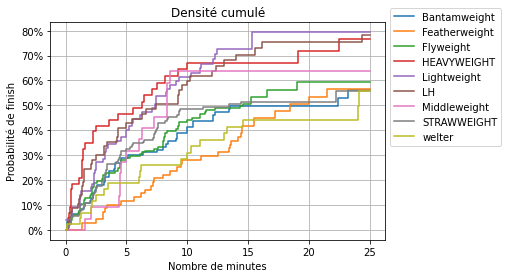

In [108]:
ax= a.plot_cumulative_density(ci_show= False)
bx = bi.plot_cumulative_density(ci_show= False)
cx= c.plot_cumulative_density(ci_show= False)
dx = d.plot_cumulative_density(ci_show= False)
ex= e.plot_cumulative_density(ci_show= False)
fx = f.plot_cumulative_density(ci_show= False)
gx= g.plot_cumulative_density(ci_show= False)
hx = hi.plot_cumulative_density(ci_show= False)
ix= i.plot_cumulative_density(ci_show= False)
plt.title("Densité cumulé")
plt.xlabel("Nombre de minutes")
plt.ylabel("Probabilité de finish")
plt.grid()
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.75))
bx.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
cx.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
dx.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ex.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
fx.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
gx.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
hx.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ix.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))


# Modélisation

In [110]:
text_cols = df.select_dtypes(include=['category']).columns

#discretisation des variables catégorielle
for col in text_cols:
    col_dummies = pd.get_dummies(df[col])
    df = pd.concat([df, col_dummies], axis=1)

In [111]:
colonne = ['Age','BANTAMWEIGHT','FEATHERWEIGHT','FLYWEIGHT','HEAVYWEIGHT','LIGHT HEAVYWEIGHT','LIGHTWEIGHT','MIDDLEWEIGHT','WELTERWEIGHT','Homme','statu','T']

In [112]:
cph = CoxPHFitter()
cph.fit(df[colonne], 'T', event_col='statu')
cph.print_summary()

C:\Users\ktshilombo\.conda\envs\Tensorflow\lib\site-packages\lifelines\utils\printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 707 total observations, 333 right-censored observations>
             duration col = 'T'
                event col = 'statu'
      baseline estimation = breslow
   number of observations = 707
number of events observed = 374
   partial log-likelihood = -2226.95
         time fit was run = 2022-09-04 09:44:33 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
Age                -0.13       0.88       0.01            -0.15            -0.10                 0.86                 0.91
BANTAMWEIGHT        0.02       1.02       0.21            -0.39             0.43                 0.68                 1.53
FEATHERWEIGHT       0.02       1.02       0.26            -0.50             0.53                 0.61                 1.71
FLYWEIGHT           0.17       1.18       0.18            -0.19             0.52                 0.83                 1.69
HEAVYWEIGHT         1.62       5.07       0.31             1.02             2.22                 2.78                 9.24
LIGHT HEAVYWEIGHT   0.70       2.02       0.27             0.18             1.22                 1.20                 3.40
LIGHTWEIGHT         0.70       2.01       0.26             0.19             1.21                 1.21                 3.34
MIDDLEWEIGHT        0.82       2.26       0.36             0.12             1.51                 1.13                 4.54
WELTERWEIGHT        0.09       1.10       0.31            -0.52             0.71                 0.59                 2.03
Homme              -0.34       0.72       0.18            -0.70             0.02                 0.50                 1.03

                    cmp to     z      p   -log2(p)
covariate                                         
Age                   0.00 -9.04 <0.005      62.47
BANTAMWEIGHT          0.00  0.10   0.92       0.12
FEATHERWEIGHT         0.00  0.07   0.94       0.08
FLYWEIGHT             0.00  0.91   0.36       1.46
HEAVYWEIGHT           0.00  5.30 <0.005      23.02
LIGHT HEAVYWEIGHT     0.00  2.64   0.01       6.91
LIGHTWEIGHT           0.00  2.71   0.01       7.20
MIDDLEWEIGHT          0.00  2.30   0.02       5.53
WELTERWEIGHT          0.00  0.30   0.77       0.38
Homme                 0.00 -1.82   0.07       3.88
---
Concordance = 0.67
Partial AIC = 4473.90
log-likelihood ratio test = 124.14 on 10 df
-log2(p) of ll-ratio test = 70.22

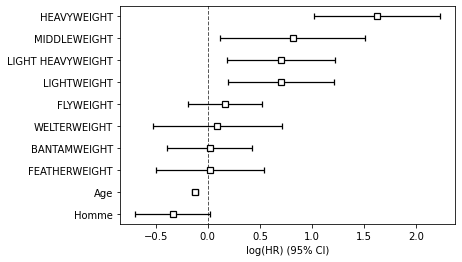

In [113]:
cph.plot()